In [1]:
! which python

/Users/no_lineal/opt/anaconda3/envs/grid38/bin/python


In [2]:
import numpy as np
import pickle

from functools import reduce

from scipy.signal import find_peaks

import os

# viz
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [3]:
""" 

    where am i?

"""

PATH = os.getcwd()
data_path = PATH.replace( '01_square_156', '' ) + 'data/01_square/01_square_1000000_156_129/'

print( f'PATH: { PATH }' )
print( f'data_path: { data_path }' )

PATH: /Users/no_lineal/Documents/draft_code/grid_metrics/01_square_156
data_path: /Users/no_lineal/Documents/draft_code/grid_metrics/data/01_square/01_square_1000000_156_129/


In [4]:
""" 

    load data

"""

ratemap_mat = np.load( data_path + 'grid_scores/ratemap.npy' )

border_mat = np.load( data_path + 'grid_scores/border.npy' )

sac_max_mat = np.load( data_path + 'grid_scores/sac/max/sac.npy' )
sac_max_score_60_mat = np.load( data_path + 'grid_scores/sac/max/score_60.npy' )
sac_max_score_90_mat = np.load( data_path + 'grid_scores/sac/max/score_90.npy' )

with open( data_path + 'grid_scores/sac/max/median_mat.pkl', 'rb' ) as f:
    sac_max_median_mat = pickle.load( f )

print('')
print( f'ratemap_mat: { ratemap_mat.shape }' )
print( f'sac_max_mat: { sac_max_mat.shape }' )
print( f'sac_max_border_mat: { border_mat.shape }' )
print( f'sac_max_score_60_mat: { sac_max_score_60_mat.shape }' )
print( f'sac_max_score_90_mat: { sac_max_score_90_mat.shape }' )
print( f'sac_max_median_mat: { len(sac_max_median_mat) }' )
print('')


ratemap_mat: (512, 32, 32)
sac_max_mat: (512, 63, 63)
sac_max_border_mat: (512,)
sac_max_score_60_mat: (512,)
sac_max_score_90_mat: (512,)
sac_max_median_mat: 512



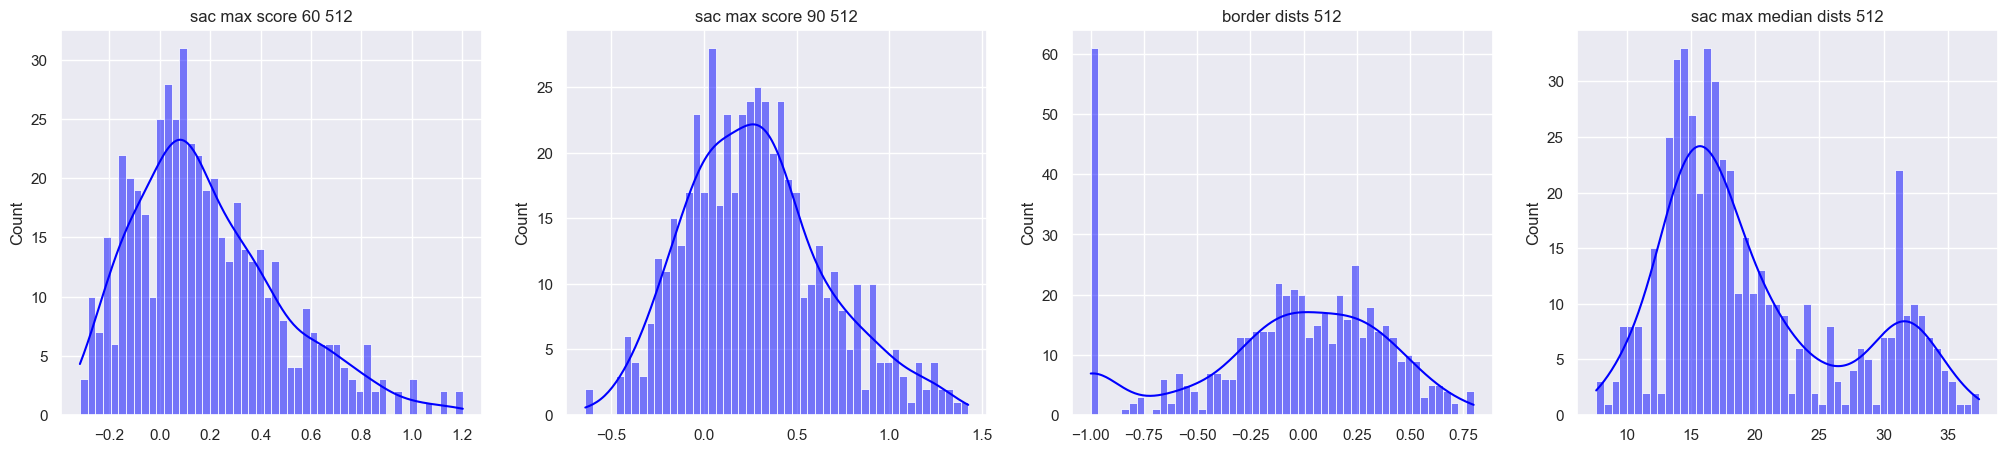

In [5]:
""" 

    viz rates/distances

"""

fig, axs = plt.subplots( 1, 4, figsize=( 25, 5 ) )

sns.histplot( sac_max_score_60_mat, ax=axs[0], color='blue', bins=50, kde=True )
axs[0].set_title( f'sac max score 60 { sac_max_score_60_mat.shape[0] }' )

sns.histplot( sac_max_score_90_mat, ax=axs[1], color='blue', bins=50, kde=True )
axs[1].set_title( f'sac max score 90 { sac_max_score_90_mat.shape[0] }' )

sns.histplot( border_mat, ax=axs[2], color='blue', bins=50, kde=True )
axs[2].set_title( f'border dists { border_mat.shape[0] }' )

sns.histplot( sac_max_median_mat, ax=axs[3], color='blue', bins=50, kde=True )
axs[3].set_title( f'sac max median dists { len(sac_max_median_mat) }' )

plt.show()

In [6]:
""" 

    filtering

"""

sac_max_score_90_th = ( -np.inf, 0.59 )

sac_max_score_60_th = ( 0.32, np.inf )

sac_max_median_th = ( -np.inf, np.inf )

border_th = ( -np.inf, 0.5 )

sac_max_score_90_filt_idx = np.where( ( sac_max_score_90_mat > sac_max_score_90_th[0] ) & ( sac_max_score_90_mat < sac_max_score_90_th[1] ) )[0]
sac_max_score_60_filt_idx = np.where( ( sac_max_score_60_mat > sac_max_score_60_th[0] ) & ( sac_max_score_60_mat < sac_max_score_60_th[1] ) )[0]
sac_max_median_filt_idx = np.where( ( np.array(sac_max_median_mat).flatten() > sac_max_median_th[0] ) & ( np.array(sac_max_median_mat).flatten() < sac_max_median_th[1] ) )[0]
border_filt_idx = np.where( ( border_mat > border_th[0] ) & ( border_mat < border_th[1] ) )[0]

sac_max_filter_idx = reduce( np.intersect1d, ( sac_max_score_90_filt_idx, sac_max_score_60_filt_idx, sac_max_median_filt_idx, border_filt_idx ) )

sac_max_score_90_filt = sac_max_score_90_mat[ sac_max_filter_idx ]
sac_max_score_60_filt = sac_max_score_60_mat[ sac_max_filter_idx ]
sac_max_median_filt = np.array(sac_max_median_mat).flatten()[ sac_max_filter_idx ]
border_filt = border_mat[ sac_max_filter_idx ]

print('')
print( f'sac max score 90 filt: { sac_max_score_90_filt.shape }' )
print( f'sac max score 60 filt: { sac_max_score_60_filt.shape }' )
print( f'sac max median filt: { sac_max_median_filt.shape }' )
print( f'border filt: { border_filt.shape }' )
print('')


sac max score 90 filt: (120,)
sac max score 60 filt: (120,)
sac max median filt: (120,)
border filt: (120,)



peaks sac max: [ 9.70991487 17.06547111 23.68547171 31.53139836]


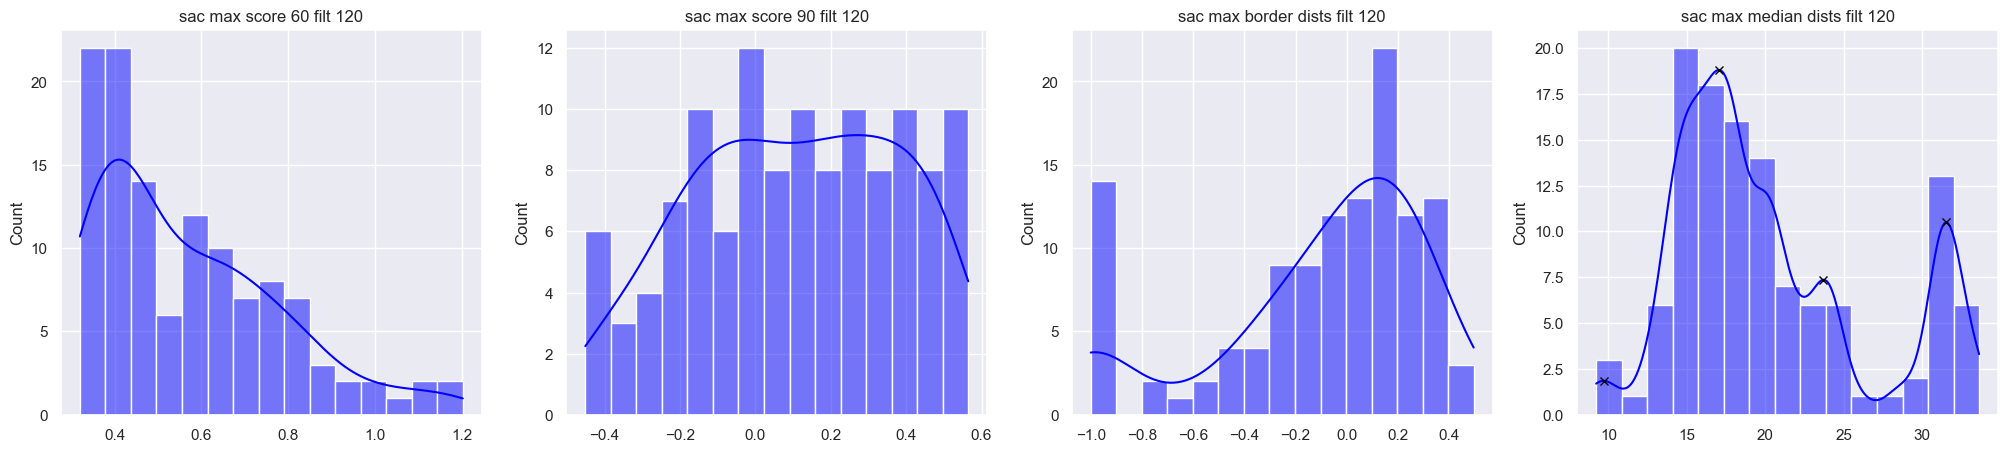

In [7]:
""" 

    viz rates/distances

"""

fig, axs = plt.subplots( 1, 4, figsize=( 25, 5 ) )

sns.histplot( sac_max_score_60_filt, ax=axs[0], color='blue', bins=15, kde=True )
axs[0].set_title( f'sac max score 60 filt { sac_max_score_60_filt.shape[0] }' )

sns.histplot( sac_max_score_90_filt, ax=axs[1], color='blue', bins=15, kde=True )
axs[1].set_title( f'sac max score 90 filt { sac_max_score_90_filt.shape[0] }' )

sns.histplot( border_filt, ax=axs[2], color='blue', bins=15, kde=True )
axs[2].set_title( f'sac max border dists filt { border_filt.shape[0] }' )

hist = sns.histplot( sac_max_median_filt, ax=axs[3], color='blue', kde=True, kde_kws={'bw_adjust': 0.4}, bins=15 )
peaks, _ = find_peaks( hist.get_lines()[0].get_data()[1] )
print( f'peaks sac max: { hist.get_lines()[0].get_data()[0][peaks] }' )
hist.plot( hist.get_lines()[0].get_data()[0][peaks], hist.get_lines()[0].get_data()[1][peaks], 'x', color='black' )
axs[3].set_title( f'sac max median dists filt { sac_max_median_filt.shape[0] }' )

plt.show()


sac max ratemap filt: (120, 32, 32)



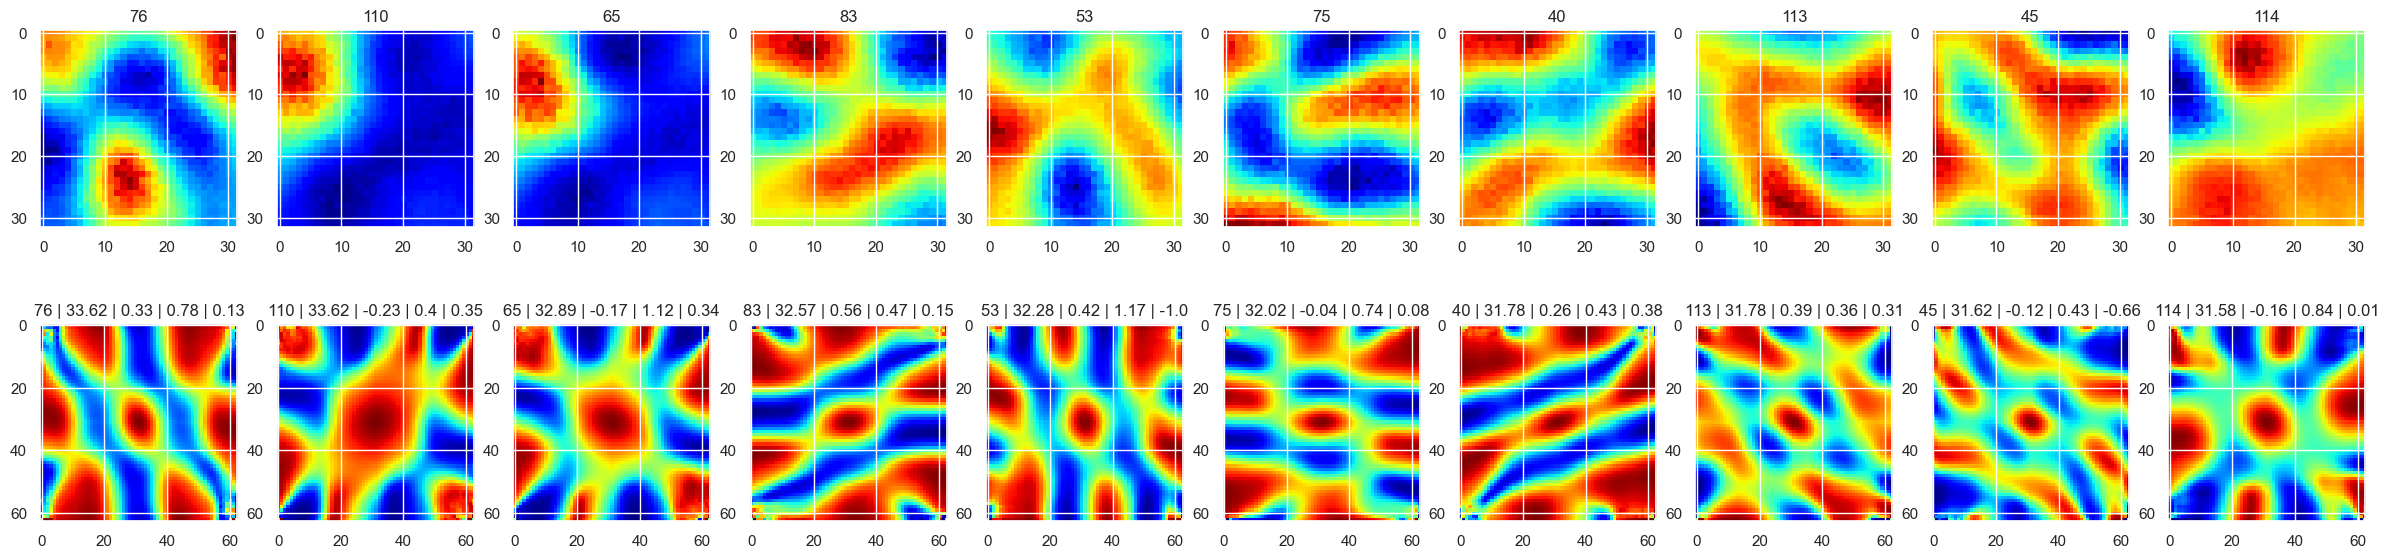

In [8]:
""" 

    activation filter

"""

sac_max_ratemap_filt = ratemap_mat[ sac_max_filter_idx ]
sac_max_filt = sac_max_mat[ sac_max_filter_idx ]

print('')
print( f'sac max ratemap filt: { sac_max_ratemap_filt.shape }' )
print('')

k = 10

sac_max_idx_th = np.argsort( sac_max_median_filt )[::-1][:k]

fig, axs = plt.subplots( 2, k, figsize=( 30, 7 ) )

for i, idx in enumerate( sac_max_idx_th ):

    axs[0, i].imshow( sac_max_ratemap_filt[idx], cmap='jet' )
    axs[0, i].set_title( f'{ idx }' )

    axs[1, i].imshow( sac_max_filt[idx], cmap='jet' )
    axs[1, i].set_title( f'{ idx } | { round( sac_max_median_filt[ idx ], 2 ) } | { round( sac_max_score_90_filt[ idx ], 2 ) } | { round( sac_max_score_60_filt[ idx ], 2 ) } | { round( border_filt[ idx ], 2 ) }' )

plt.show()